# Fraud Detection


## Project Overview:
This Jupyter Notebook presents a fraud detection project that focuses on using a logistic regression model to identify fraudulent transactions. The project involves loading transaction data, preprocessing it, training the model, and evaluating its performance.

### Code Components:

* Data Loading and Exploration:
The project begins by loading the transaction data from a CSV file and exploring its structure and summary statistics.

* Feature Engineering:
New features, including 'isPayment,' 'isMovement,' and 'accountDiff,' are created to enhance the dataset's information. These features are designed to capture patterns related to payment types and movement types.

* Data Splitting and Normalization: 
The dataset is split into training and testing sets for model training and evaluation. The features are also standardized using the StandardScaler.

* Model Training:
A logistic regression model is trained using the training data to predict fraudulent transactions based on the engineered features.

* Model Evaluation:
The model's performance is evaluated on both the training and testing datasets. Metrics such as accuracy and the Receiver Operating Characteristic (ROC) curve are used to assess its effectiveness.

* Visualizations: 
A series of insightful visualizations are created to better understand the data, feature importance, and model performance. These include histograms, bar plots, correlation heatmaps, and more.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
transactions = pd.read_csv("data/transactions.csv")
transactions = transactions.drop(columns=["isPayment","isMovement", "accountDiff"])
transactions.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [21]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1000 non-null   int64  
 1   type            1000 non-null   object 
 2   amount          1000 non-null   float64
 3   nameOrig        1000 non-null   object 
 4   oldbalanceOrg   1000 non-null   float64
 5   newbalanceOrig  1000 non-null   float64
 6   nameDest        1000 non-null   object 
 7   oldbalanceDest  1000 non-null   float64
 8   newbalanceDest  1000 non-null   float64
 9   isFraud         1000 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 78.2+ KB


In [22]:
transactions.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,280.664000,5.373080e+05,1.049284e+06,6.376146e+05,1.028848e+06,1.302326e+06,0.282000
std,167.174593,1.423692e+06,3.226500e+06,2.717351e+06,2.678541e+06,3.038042e+06,0.450198
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,164.000000,2.933705e+04,1.287500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,261.000000,1.265305e+05,4.371400e+04,0.000000e+00,3.881927e+04,1.956572e+05,0.000000
75%,373.250000,3.010378e+05,4.080914e+05,3.795663e+04,7.747167e+05,1.185959e+06,1.000000
max,741.000000,1.000000e+07,5.039905e+07,4.039905e+07,3.085651e+07,3.183962e+07,1.000000


In [23]:
transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,206,CASH_OUT,62927.08,C473782114,0.00,0.00,C2096898696,649420.67,712347.75,0
1,380,PAYMENT,32851.57,C1915112886,0.00,0.00,M916879292,0.00,0.00,0
2,570,CASH_OUT,1131750.38,C1396198422,1131750.38,0.00,C1612235515,313070.53,1444820.92,1
3,184,CASH_OUT,60519.74,C982551468,60519.74,0.00,C1378644910,54295.32,182654.50,1
4,162,CASH_IN,46716.01,C1759889425,7668050.60,7714766.61,C2059152908,2125468.75,2078752.75,0


### How many transactions are fraudulent?

Since fraudulent are represented as 1, I am using sum() method to count the number of fraudulent transactions

In [9]:
transactions.isFraud.sum()

282

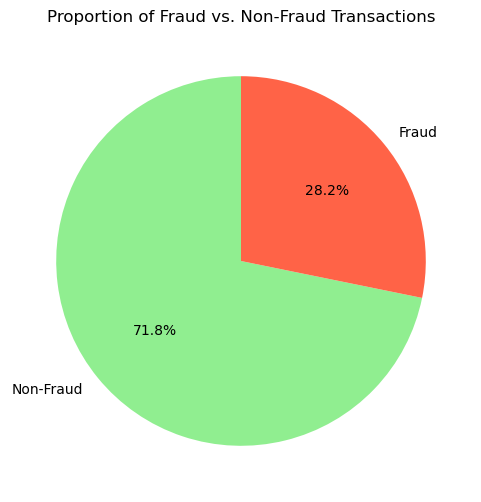

In [59]:
plt.figure(figsize=(6, 6))
fraud_counts = transactions['isFraud'].value_counts()
labels = ['Non-Fraud', 'Fraud']
colors = ['lightgreen', 'tomato']
plt.pie(fraud_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Fraud vs. Non-Fraud Transactions')
plt.show()

In [10]:
transactions.amount.describe()

count    1.000000e+03
mean     5.373080e+05
std      1.423692e+06
min      0.000000e+00
25%      2.933705e+04
50%      1.265305e+05
75%      3.010378e+05
max      1.000000e+07
Name: amount, dtype: float64

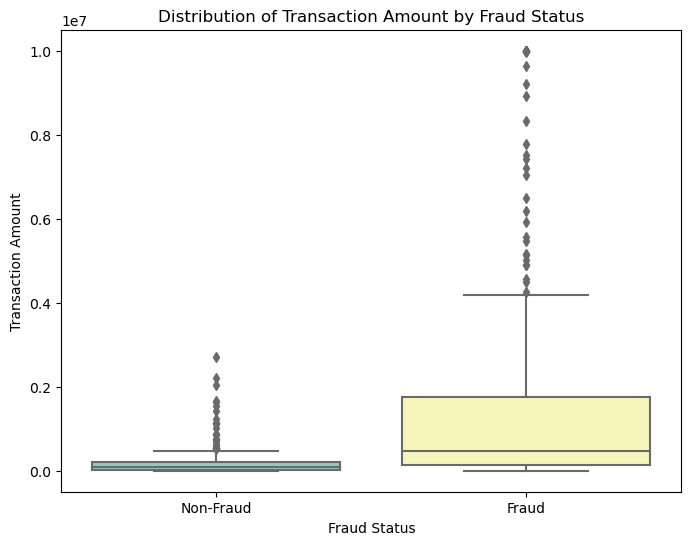

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=transactions, x='isFraud', y='amount', palette='Set3')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Amount')
plt.title('Distribution of Transaction Amount by Fraud Status')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

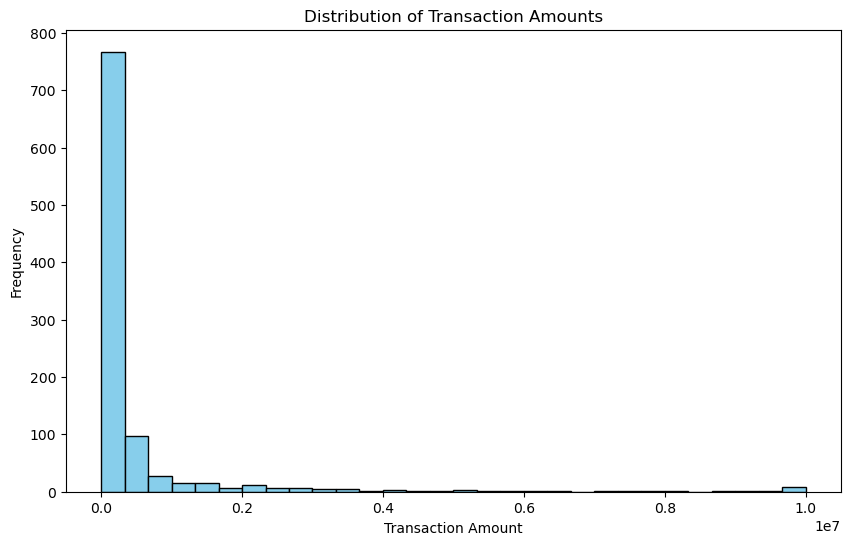

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(transactions['amount'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

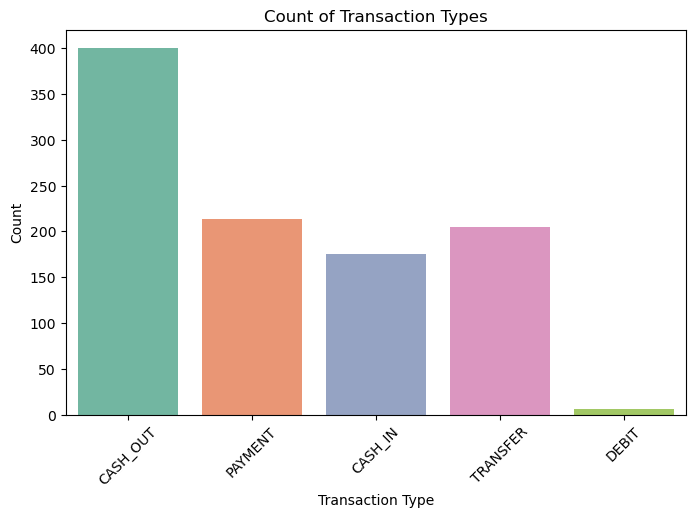

In [54]:
plt.figure(figsize=(8, 5))
sns.countplot(data=transactions, x='type', palette='Set2')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Count of Transaction Types')
plt.xticks(rotation=45)
plt.show()

Let’s create a new column called isPayment that assigns a 1 when type is “PAYMENT” or “DEBIT”, and a 0 otherwise.

In [25]:
# Create isPayment field
transactions['isPayment'] = 0
transactions['isPayment'][transactions['type'].isin(['PAYMENT','DEBIT'])] = 1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24660\932289185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['isPayment'][transactions['type'].isin(['PAYMENT','DEBIT'])] = 1


Similarly, let's create a column called isMovement, which will capture if money moved out of the origin account. This column will have a value of 1 when type is either “CASH_OUT” or “TRANSFER”, and a 0 otherwise.

In [26]:
# Create isMovement field
transactions['isMovement'] = 0
transactions['isMovement'][transactions['type'].isin(['CASH_OUT', 'TRANSFER'])] = 1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24660\3197595553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['isMovement'][transactions['type'].isin(['CASH_OUT', 'TRANSFER'])] = 1


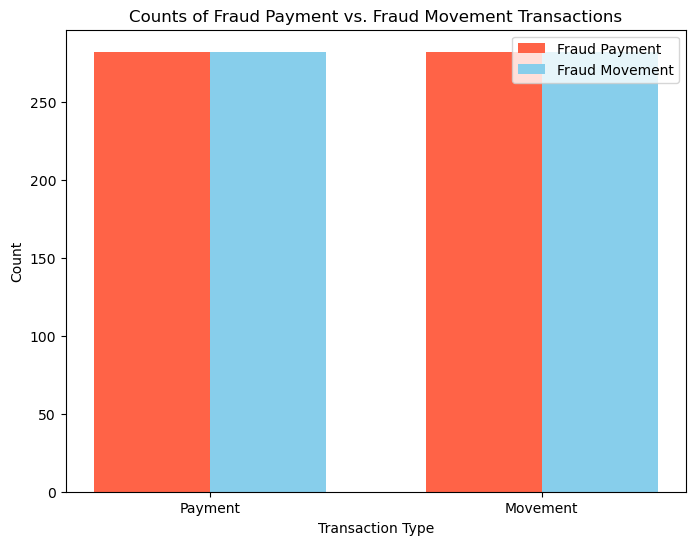

In [62]:
plt.figure(figsize=(8, 6))
fraud_payment_counts = transactions[transactions['isFraud'] == 1]['isPayment'].value_counts()
fraud_movement_counts = transactions[transactions['isFraud'] == 1]['isMovement'].value_counts()

labels = ['Payment', 'Movement']
x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, fraud_payment_counts, width, label='Fraud Payment', color='tomato')
plt.bar(x + width/2, fraud_movement_counts, width, label='Fraud Movement', color='skyblue')

plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Counts of Fraud Payment vs. Fraud Movement Transactions')
plt.xticks(x, labels)
plt.legend()
plt.show()

With financial fraud, another key factor to investigate would be the difference in value between the origin and destination account. In this case, being that destination accounts with a significantly different value could be suspect of fraud. Let’s create a column called accountDiff with the absolute difference of the oldbalanceOrg and oldbalanceDest columns.

In [33]:
# Create accountDiff field
transactions['accountDiff'] = abs(transactions['oldbalanceDest'] - transactions['oldbalanceOrg'])

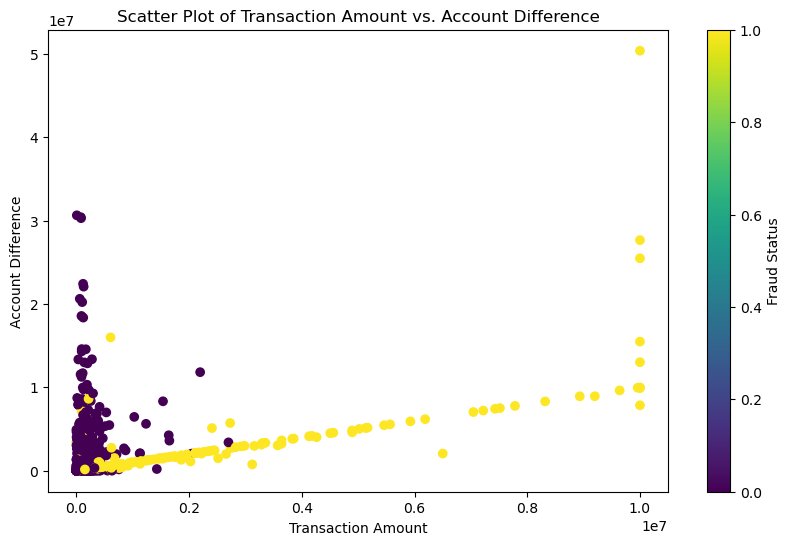

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(transactions['amount'], transactions['accountDiff'], c=transactions['isFraud'], cmap='viridis')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Difference')
plt.title('Scatter Plot of Transaction Amount vs. Account Difference')
plt.colorbar(label='Fraud Status')
plt.show()

In [34]:
transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isPayment,isMovement,accountDiff
0,206,CASH_OUT,62927.08,C473782114,0.00,0.00,C2096898696,649420.67,712347.75,0,0,1,649420.67
1,380,PAYMENT,32851.57,C1915112886,0.00,0.00,M916879292,0.00,0.00,0,1,0,0.00
2,570,CASH_OUT,1131750.38,C1396198422,1131750.38,0.00,C1612235515,313070.53,1444820.92,1,0,1,818679.85
3,184,CASH_OUT,60519.74,C982551468,60519.74,0.00,C1378644910,54295.32,182654.50,1,0,1,6224.42
4,162,CASH_IN,46716.01,C1759889425,7668050.60,7714766.61,C2059152908,2125468.75,2078752.75,0,0,0,5542581.85


# Logistic Regression


Before we can start training our model, we need to define our features and label columns. Our label column in this dataset is the isFraud field. Let's create a variable called features which will be an array consisting of the following fields:

* amount
* isPayment
* isMovement
* accountDiff

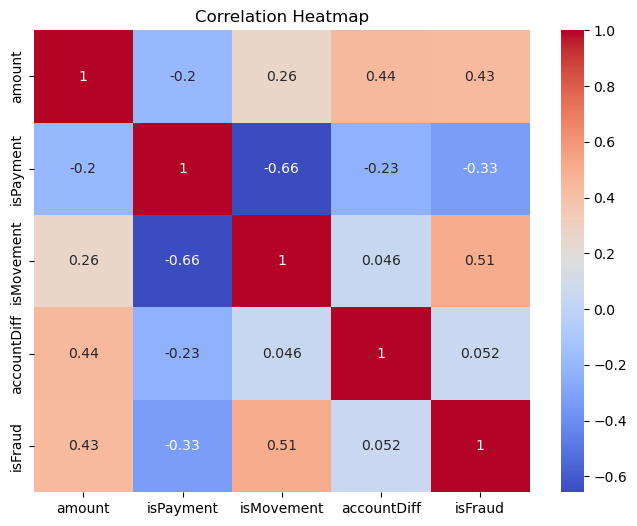

In [55]:
plt.figure(figsize=(8, 6))
correlation_matrix = transactions[['amount', 'isPayment', 'isMovement', 'accountDiff', 'isFraud']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
# Create features and label variables
features = transactions[['amount','isPayment','isMovement','accountDiff']]
label = transactions['isFraud']

In [37]:
features.head()

,amount,isPayment,isMovement,accountDiff
0,62927.08,0,1,649420.67
1,32851.57,1,0,0.00
2,1131750.38,0,1,818679.85
3,60519.74,0,1,6224.42
4,46716.01,0,0,5542581.85


In [38]:
print(label[:5])

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64


In [39]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3)                                           

In [40]:
# Normalize the features variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Fit the model to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Performance Evaluation

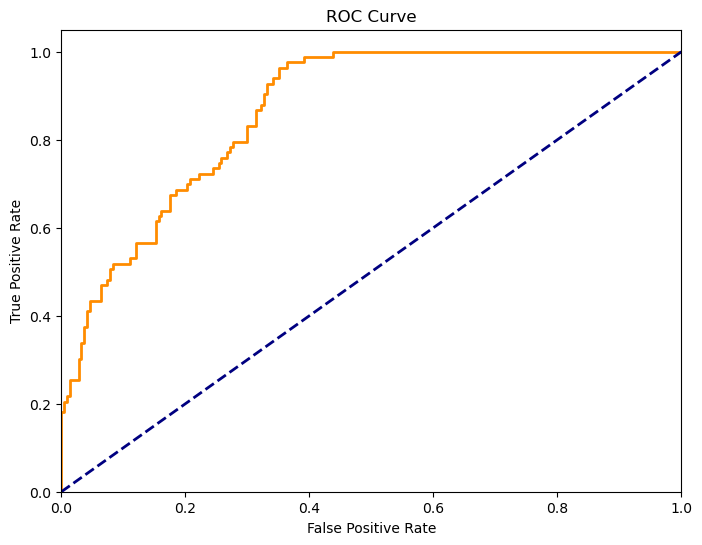

AUC Score: 0.87


In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score:.2f}')

In [42]:
# Score the model on the training data
print(model.score(X_train, y_train))

0.8557142857142858


In [43]:
# Score the model on the test data
print(model.score(X_test, y_test))

0.8033333333333333


In [44]:
# Print the model coefficients
print(model.coef_)

[[ 2.84863587 -0.57722134  2.09787698 -0.90408446]]


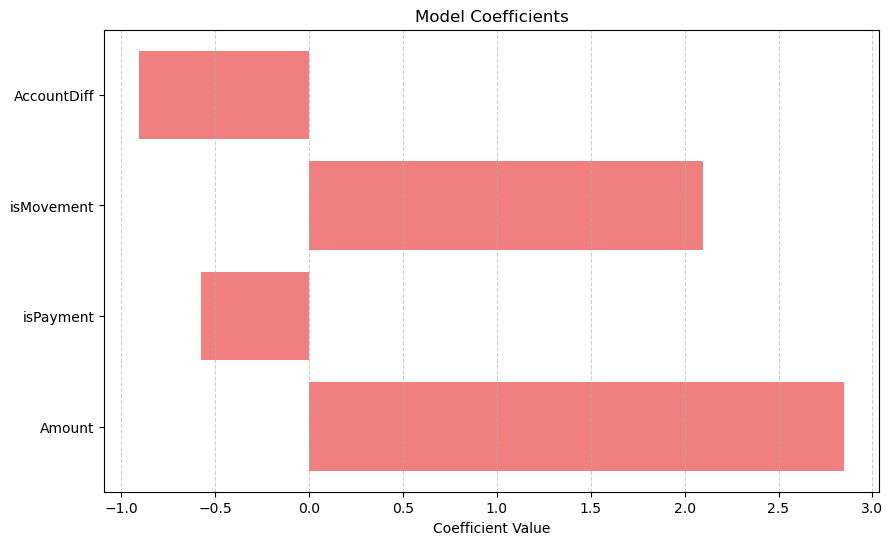

In [58]:
plt.figure(figsize=(10, 6))
coef_values = model.coef_.flatten()
feature_names = ['Amount', 'isPayment', 'isMovement', 'AccountDiff']

plt.barh(feature_names, coef_values, color='lightcoral')
plt.xlabel('Coefficient Value')
plt.title('Model Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Prediction

In [45]:
# New transaction data
transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])
transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])

In [46]:
# Create a new transaction
your_transaction = np.array([6472.54, 1.0, 0.0, 55901.23])

In [47]:
# Combine new transactions into a single array
sample_transactions = np.stack((transaction1,transaction2,transaction3,your_transaction))

In [48]:
# Normalize the new transactions
sample_transactions = scaler.transform(sample_transactions)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
# Predict fraud on the new transactions
print(model.predict(sample_transactions))

[0 0 0 0]


In [50]:
# Show probabilities on the new transactions
print(model.predict_proba(sample_transactions))

[[0.63094747 0.36905253]
 [0.99809874 0.00190126]
 [0.99608748 0.00391252]
 [0.99841667 0.00158333]]


The 1st column is the probability of a transaction not being fraudulent, and the 2nd column is the probability of a transaction being fraudulent.

# Results and Insights:
The project provides a comprehensive analysis of the dataset and the logistic regression model's performance in detecting fraudulent transactions. Visualizations and metrics help identify important patterns and showcase the model's effectiveness.